In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import ndimage

In [ ]:
def draw_quadrangle(X, Y, color = 'b', limX = [-50, 50], limY = [-50, 50]):
    plt.scatter(X,Y,color = color)
    plt.xlim(limX)
    plt.ylim(limY)

f1,f2 = np.meshgrid(np.arange(2,8), np.arange(3,15))
X = f1. flatten()
Y = f2. flatten()
draw_quadrangle(X, Y, limX=[0, 30], limY=[0, 40])

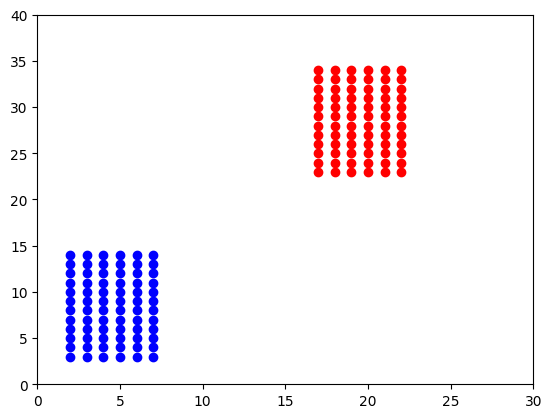

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure with white background
plt.figure(facecolor='white')

# Define original points using meshgrid to match the provided pattern
f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()

# Define the translation values (tx, ty)
tx = 15  # Translate by 15 units along x
ty = 20  # Translate by 20 units along y

# Translate each point manually using matrix multiplication
translated_X = []
translated_Y = []

for i in range(len(X)):
    original_point = [X[i], Y[i], 1]
    new_x = original_point[0] * 1 + original_point[1] * 0 + original_point[2] * tx
    new_y = original_point[0] * 0 + original_point[1] * 1 + original_point[2] * ty
    translated_X.append(new_x)
    translated_Y.append(new_y)

# Plot the original points in blue
plt.scatter(X, Y, color='b', label='Original Points')

# Plot the translated points in red
plt.scatter(translated_X, translated_Y, color='r', label='Translated Points')

# Set limits for x and y axes
plt.xlim(0, 30)
plt.ylim(0, 40)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure with white background
plt.figure(facecolor='white')

# Define original points using meshgrid to match the provided pattern
f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()

# Convert degrees to radians for rotation
theta_deg = 60  # Rotation angle in degrees
theta_rad = np.radians(theta_deg)  # Convert to radians

# Define the rotation matrix
rotation_matrix = np.array([
    [np.cos(theta_rad), -np.sin(theta_rad), 0],
    [np.sin(theta_rad), np.cos(theta_rad), 0],
    [0, 0, 1]
])

# Rotate each point manually using matrix multiplication
rotated_X = []
rotated_Y = []

for i in range(len(X)):
    # Original point in homogeneous coordinates: [x, y, 1]
    original_point = np.array([X[i], Y[i], 1])

    # Apply rotation matrix
    rotated_point = np.matmul(rotation_matrix, original_point)

    # Append the rotated points to the new lists
    rotated_X.append(rotated_point[0])
    rotated_Y.append(rotated_point[1])

# Plot the original points in blue
plt.scatter(X, Y, color='b', label='Original Points')

# Plot the rotated points in red
plt.scatter(rotated_X, rotated_Y, color='r', label='Rotated Points')

# Set limits for x and y axes
plt.xlim(-20, 20)  # Adjusted limits to match the rotation
plt.ylim(0, 40)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure with white background
plt.figure(facecolor='white')

# Define original points using meshgrid to match the provided pattern
f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()

# Define the scaling factors
scale_x = 3  # Scale x by 3
scale_y = 0.5  # Scale y by 0.5

# Define the translation values (tx, ty)
tx = 15  # Translate by 15 units along x
ty = 20  # Translate by 20 units along y

# Apply scaling and translation manually using matrix multiplication
scaled_translated_X = []
scaled_translated_Y = []

for i in range(len(X)):
    # Original point in homogeneous coordinates: [x, y, 1]
    original_point = np.array([X[i], Y[i], 1])

    # Apply scaling matrix first
    scaling_matrix = np.array([
        [scale_x, 0, 0],
        [0, scale_y, 0],
        [0, 0, 1]
    ])
    scaled_point = np.matmul(scaling_matrix, original_point)

    # Then apply translation matrix
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    transformed_point = np.matmul(translation_matrix, scaled_point)

    # Append the transformed points to the new lists
    scaled_translated_X.append(transformed_point[0])
    scaled_translated_Y.append(transformed_point[1])

# Plot the original points in blue
plt.scatter(X, Y, color='b', label='Original Points')

# Plot the scaled and translated points in red
plt.scatter(scaled_translated_X, scaled_translated_Y, color='r', label='Scaled & Translated Points')

# Set limits for x and y axes
plt.xlim(0, 50)  # Adjust limits to match the transformation
plt.ylim(0, 50)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Transformation matrix T
T = np.array([[5, 5, 10],
              [5, 7, 70],
              [0.25, 0.5, 1]])

# Coordinates of the initial points
f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()

# Create homogeneous coordinates matrix
ones = np.ones(len(X))
points = np.vstack([X, Y, ones])

# Apply the transformation matrix T
transformed_points = T @ points

# Extract X and Y coordinates after transformation
X_transformed = transformed_points[0, :] / transformed_points[2, :]
Y_transformed = transformed_points[1, :] / transformed_points[2, :]

# Plot original points (blue)
plt.scatter(X, Y, color='b', label='Original Points')

# Plot transformed points (red)
plt.scatter(X_transformed, Y_transformed, color='r', label='Transformed Points')

# Adjust the limits for the X and Y axes
plt.xlim(0, max(X.max(), X_transformed.max()) + 5)
plt.ylim(0, 35)

# Set specific values for the X axis
plt.xticks([0, 5, 10, 15, 20, 25, 30])

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given point P
P = np.array([2, 3, 1])

# Reflection matrices
reflection_x = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])

reflection_y = np.array([
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

reflection_xy = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

# Apply reflection matrices
P_reflection_x = reflection_x @ P
P_reflection_y = reflection_y @ P
P_reflection_xy = reflection_xy @ P

# Extract coordinates for plotting
points = {
    "Original P(2,3)": P[:2],
    "Reflection across x-axis": P_reflection_x[:2],
    "Reflection across y-axis": P_reflection_y[:2],
    "Reflection across line y=x": P_reflection_xy[:2]
}

# Define colors (red for original, purple for x-axis, green for y-axis, blue for line y=x)
colors = {
    "Original P(2,3)": 'red',
    "Reflection across line y=x": 'purple',
    "Reflection across y-axis": 'green',
    "Reflection across x-axis": 'blue'


}

# Plot the points
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Plot the original and reflected points with updated colors
for label, point in points.items():
    plt.scatter(point[0], point[1], label=label, color=colors[label])

# Draw a diagonal line y=x with thinner linewidth
plt.plot([-5, 5], [-5, 5], color='black', linestyle='--', linewidth=0.5, label='y = x')

# Set equal scaling
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')

# Add axis labels
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Add legend with a slightly smaller fontsize
plt.legend(loc='upper left', fontsize=8)

# Display the grid and plot
plt.grid(True)
plt.show()

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Relative paths to the files
tv_image_path = 'Màn hình tv.jpg'
input_image_path = 'Hình cần chiếu.jpg'


In [ ]:
# Check the existence of the files
if not os.path.isfile(tv_image_path):
    print(f"The file {tv_image_path} does not exist.")
if not os.path.isfile(input_image_path):
    print(f"The file {input_image_path} does not exist.")

In [ ]:
# Read images
tv_image = cv2.imread(tv_image_path)
input_image = cv2.imread(input_image_path)

Did not find exactly 4 corner points.
TV corner points: [[[197 189]]

 [[197 530]]

 [[775 530]]

 [[773 188]]]


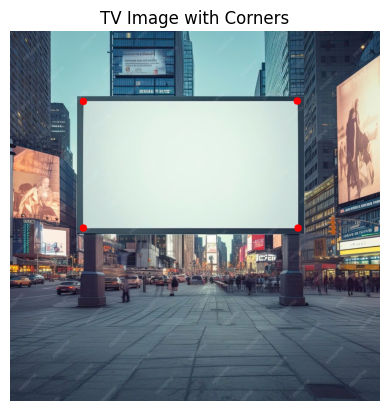

In [ ]:
# Read images if the files exist
if os.path.isfile(tv_image_path) and os.path.isfile(input_image_path):
    tv_image = cv2.imread(tv_image_path)
    input_image = cv2.imread(input_image_path)

    # Convert the image to grayscale
    def find_corners(image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blurred, 50, 150)

        # Find contours
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Find the largest contour
        contour = max(contours, key=cv2.contourArea)

        # Approximate the corner points of the bounding rectangle
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) == 4:
            # Draw corner points on the image
            for point in approx:
                cv2.circle(image, tuple(point[0]), 10, (0, 0, 255), -1)
            return approx
        else:
            print("Did not find exactly 4 corner points.")
            return None

    # Find corners for the TV image and the input image
    tv_corners = find_corners(tv_image)
    input_corners = find_corners(input_image)

    if tv_corners is not None:
        print("TV corner points:", tv_corners)

    if input_corners is not None:
        print("Input image corner points:", input_corners)

    # Display the images with the found corners using matplotlib
    def show_image_with_corners(title, image):
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

    # Display the TV image and the input image
    show_image_with_corners("TV Image with Corners", tv_image)
    show_image_with_corners("Input Image with Corners", input_image)


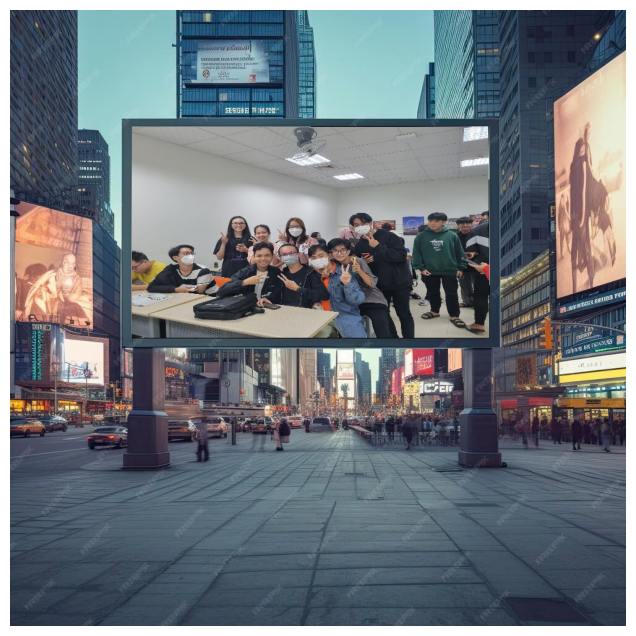

In [29]:

import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Dimensions of the input image
input_height, input_width = input_image.shape[:2]

# Assume the corners of the TV screen have been predetermined
tv_corners = np.array([
    [197, 189],  # Top-left corner
    [773, 188],  # Top-right corner
    [775, 530],  # Bottom-right corner
    [197, 530]   # Bottom-left corner
], dtype=np.float32)

# Create corresponding points for the input image (reference is a rectangle)
input_corners = np.array([
    [0, 0],  # Top-left corner of the image
    [input_width, 0],  # Top-right corner of the image
    [input_width, input_height],  # Bottom-right corner of the image
    [0, input_height]  # Bottom-left corner of the image
], dtype=np.float32)

# Compute the perspective transformation matrix
M = cv2.getPerspectiveTransform(input_corners, tv_corners)

# Warp the input image to fit the TV screen's dimensions and position
warped_image = cv2.warpPerspective(input_image, M, (tv_image.shape[1], tv_image.shape[0]))

# Overlay the image on the TV by creating a mask
mask = np.zeros_like(tv_image, dtype=np.uint8)
cv2.fillPoly(mask, [tv_corners.astype(int)], (255, 255, 255))

# Create the overlay of the image onto the TV
tv_image_masked = cv2.bitwise_and(tv_image, cv2.bitwise_not(mask))
warped_image_masked = cv2.bitwise_and(warped_image, mask)

# Combine the TV image with the overlaid image
result_image = cv2.add(tv_image_masked, warped_image_masked)

# Display the result
plt.figure(figsize=(15, 8))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()